This project addresses a binary classification problem where a model is developed to predict the class of images using training, validation, and test data. A pre-trained CNN model called MobileNetV2 is used through transfer learning.

In [1]:
# TensorFlow and Keras utilities
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* Data augmentation helps make the model more robust and generalizable.
* We show the same image from different angles, with different brightness levels, shifted, etc.
* Increases the model's tolerance to real-world variations.

In [2]:
# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,                   # Normalize pixel values to [0,1]
    rotation_range=30,               # Random rotation
    zoom_range=0.3,                  # Random zoom
    width_shift_range=0.2,           # Horizontal shift
    height_shift_range=0.2,          # Vertical shift
    shear_range=0.2,                 # Shearing transformation
    brightness_range=[0.7, 1.3],     # Random brightness
    horizontal_flip=True,            # Random horizontal flipping
    fill_mode='nearest'              # Fill in missing pixels
)

# Only normalization for validation and test data
test_val_datagen = ImageDataGenerator(rescale=1./255)


In [3]:
# Load training data
train_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/kendidatam/train/',
    target_size=(150, 300),    # Resize images to (height, width)
    batch_size=32,
    class_mode='binary'        # For binary classification (0 or 1)
)

# Load validation data
val_data = test_val_datagen.flow_from_directory(
    '/content/drive/MyDrive/kendidatam/val/',
    target_size=(150, 300),
    batch_size=32,
    class_mode='binary'
)

# Load test data (with no shuffling for correct evaluation)
test_data = test_val_datagen.flow_from_directory(
    '/content/drive/MyDrive/kendidatam/test/',
    target_size=(150, 300),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 4800 images belonging to 2 classes.
Found 900 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


# Why Did We Use CNN ?


*   CNNs are the most successful deep learning architectures for image data.
*   Automatically learn features like edges, corners, patterns in the image.
*   Are resistant to changes in length, angle, and scale.
*   Liste öğesi




---


# Why Use Transfer Learning and MobileNetV2?

*   Transfer learning is the technique of adapting pre-trained models from large datasets to our specific problem.
*   Lightweight, Fast, High accuracy.
*   Trained on large datasets





In [4]:
# Load pre-trained MobileNetV2 without top layers
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(150, 300, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze base model to prevent training its weights
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)        # Reduce feature map to vector
x = Dense(128, activation='relu')(x)   # Fully connected layer
x = Dropout(0.5)(x)                     # Dropout for regularization
output = Dense(1, activation='sigmoid')(x)  # Output layer for binary classification

# Define final model
model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


<ipython-input-4-b9b7dca8d4c7>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 75, 150,   │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 75, 150,   │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 75, 150,   │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 150,   │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 150,   │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 150,   │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 150,   │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 150,   │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 75, 150,   │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 75, 150,   │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 75, 150,   │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 77, 151,   │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 38, 75,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 75,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 75,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 38, 75,    │      2,304 │ block_1_depthwis

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)



*   GlobalAveragePooling2D:
  *   Converts information from the feature map to a vector by averaging.
  *   Significantly reduces the number of parameters.
  *   Prevents overfitting.

*   Dense(128, relu):
  *   Fully connected layer with 128 neurons. Used to learn the visual representations.
  *   ReLU (Rectified Linear Unit): Zeroes out negative values and passes positive ones. It’s the most commonly used activation function in deep networks.

*   Dropout(0.5):
  *   Randomly drops 50% of neurons during training.
  *   Helps prevent overfitting.

*   Dense(1, sigmoid):
  *   The final layer. Outputs a single value.
  *   Sigmoid activation: Outputs a probability value between 0 and 1.
  *   Sigmoid is ideal for binary classification.




# Loss Function: Binary Crossentropy
*   The most suitable loss function for binary classification.
*   It calculates the difference between the true class and the model's prediction.
*   Works very well with sigmoid because the target is either 0 or 1.
*   Adam optimizer: Adjusts the learning rate adaptively, often giving the most efficient results.




In [5]:
# Save the best model during training
checkpoint = ModelCheckpoint('/content/mobilenetv2_best_model.keras', save_best_only=True)

# Stop training early if no improvement on validation loss
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


Why Use EarlyStopping and ModelCheckpoint?


  EarlyStopping:

     * Stops training when validation loss doesn’t improve for a certain number of epochs.

     * Prevents overfitting.


  ModelCheckpoint:

     * Automatically saves the model with the best validation performance.

In [6]:
# Train the model using training and validation data
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,                      # Maximum number of epochs
    callbacks=[checkpoint, early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1417s 9s/step - accuracy: 0.9208 - loss: 0.1853 - val_accuracy: 0.9844 - val_loss: 0.0386
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 78s 521ms/step - accuracy: 0.9733 - loss: 0.0714 - val_accuracy: 0.9833 - val_loss: 0.0465
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 80s 534ms/step - accuracy: 0.9783 - loss: 0.0563 - val_accuracy: 0.9811 - val_loss: 0.0496
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 78s 520ms/step - accuracy: 0.9804 - loss: 0.0557 - val_accuracy: 0.9867 - val_loss: 0.0346
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 77s 514ms/step - accuracy: 0.9826 - loss: 0.0514 - val_accuracy: 0.9878 - val_loss: 0.0312
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 76s 508ms/step - accuracy: 0.9811 - loss: 0.0517 - val_accuracy: 0.9878 - val_loss: 0.0351
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 83s 515ms/step - accuracy: 0.9840 - loss: 0.0477 - val_accuracy: 0.9889 - val_loss: 0.0233
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 79s 525ms/step - accuracy: 0.9856 - loss: 0.

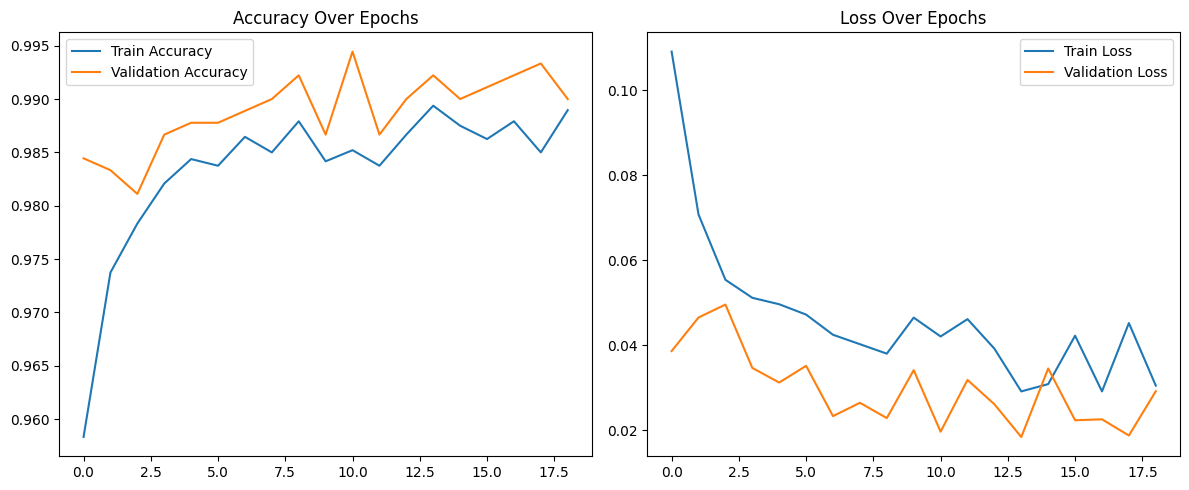

In [7]:
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


* We test the model with data it has never seen before.
* Reflects how the model will perform in the real world.
* If training and validation scores are high, but test scores are low:
* The model may have overfitted to the training data.

In [8]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_data)

# Print results
print(f"\n✅ Test Accuracy: {test_acc:.4f}")
print(f"❌ Test Loss: {test_loss:.4f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 90s 10s/step - accuracy: 0.9769 - loss: 0.0691

✅ Test Accuracy: 0.9533
❌ Test Loss: 0.1383
